<a href="https://colab.research.google.com/github/viniciusriosfuck/python-financas/blob/main/Python_para_finan%C3%A7as_taxas_de_retorno.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Python para finanças - taxas de retorno

## Importação das bibliotecas e base de dados

In [ ]:
import pandas as pd
import numpy as np
from pandas_datareader import data
import plotly.express as px

In [ ]:
acoes = ['GOLL4.SA', 'CVCB3.SA', 'WEGE3.SA', 'MGLU3.SA', 'TOTS3.SA', 'BOVA11.SA']
acoes_df = pd.DataFrame()
for acao in acoes:
  acoes_df[acao] = data.DataReader(acao, data_source='yahoo', start='2015-01-01')['Close']

acoes_df = acoes_df.rename(columns={'GOLL4.SA': 'GOL', 'CVCB3.SA': 'CVC', 'WEGE3.SA': 'WEGE',
                                    'MGLU3.SA': 'MGLU', 'TOTS3.SA': 'TOTS', 'BOVA11.SA': 'BOVA'})

acoes_df.dropna(inplace=True)
acoes_df.to_csv('acoes.csv')

dataset_raw = pd.read_csv('acoes.csv')
dataset = dataset_raw.copy()

In [ ]:
dataset.shape

(1503, 7)

In [ ]:
dataset

,Date,GOL,CVC,WEGE,MGLU,TOTS,BOVA
0,2015-01-02,14.990000,15.200000,11.846153,0.232812,11.910702,47.259998
1,2015-01-05,14.850000,15.000000,11.926923,0.237187,11.544731,46.320000
2,2015-01-06,15.210000,14.800000,11.750000,0.234062,10.822770,46.580002
3,2015-01-07,14.550000,14.670000,11.615384,0.241875,10.746248,48.150002
4,2015-01-08,14.270000,14.150000,11.811538,0.240000,10.995774,48.509998
...,...,...,...,...,...,...,...
1498,2021-01-22,22.670000,18.370001,88.260002,26.000000,30.150000,113.180000
1499,2021-01-26,22.209999,17.440001,88.949997,25.750000,30.110001,112.970001
1500,2021-01-27,23.030001,18.020000,88.690002,25.790001,28.740000,112.970001
1501,2021-01-28,24.610001,18.959999,87.690002,26.049999,28.920000,113.910004


## Taxa de retorno simples

* Comparativo entre diferentes ações (simples)
* Comparativo com a mesma ação (logarítmica)

$$ RS = \frac{p_f-p_0}{p_0}  $$

$$ RL = \log\left(\frac{p_f-p_0}{p_0}\right)  $$

taxa corretagem compra R\$ 10 (negativo), venda (2,5)
dividendo (positivo)

In [ ]:
dataset.iloc[[0,-1],1:]

,GOL,CVC,WEGE,MGLU,TOTS,BOVA
0,14.990000,15.200000,11.846153,0.232812,11.910702,47.259998
1502,23.950001,19.040001,83.790001,25.270000,28.400000,110.559998


In [ ]:
dataset.iloc[-1,1:]/dataset.iloc[0,1:]-1

GOL     0.597732
CVC     0.252632
WEGE     6.07318
MGLU     107.543
TOTS     1.38441
BOVA      1.3394
dtype: object

In [ ]:
# dias de bolsa / ano
pd.to_datetime(dataset['Date']).dt.year.value_counts()

2017    254
2016    249
2019    247
2015    246
2018    245
2020    243
2021     19
Name: Date, dtype: int64

In [ ]:
pd.to_datetime(dataset['Date']).dt.year.value_counts()[:-1].mean()  # dias de bolsa / ano

247.33333333333334

In [ ]:
dataset = dataset_raw.copy()
dias_bolsa_ano = 246
dct_RS_anual = {}
dct_RL_anual = {}
for col in dataset.columns[1:]:
    dataset['RS '+ col] = (dataset[col]/dataset[col].shift(1)) - 1
    dataset['RL '+ col] = np.log(dataset[col]/dataset[col].shift(1))
    dct_RS_anual[col] = dataset['RS '+ col].mean()*dias_bolsa_ano
    dct_RL_anual[col] = dataset['RL '+ col].mean()*dias_bolsa_ano
dataset

,Date,GOL,CVC,WEGE,MGLU,TOTS,BOVA,RS GOL,RL GOL,RS CVC,RL CVC,RS WEGE,RL WEGE,RS MGLU,RL MGLU,RS TOTS,RL TOTS,RS BOVA,RL BOVA
0,2015-01-02,14.990000,15.200000,11.846153,0.232812,11.910702,47.259998,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2015-01-05,14.850000,15.000000,11.926923,0.237187,11.544731,46.320000,-0.009340,-0.009383,-0.013158,-0.013245,0.006818,0.006795,0.018792,0.018618,-0.030726,-0.031208,-0.019890,-0.020090
2,2015-01-06,15.210000,14.800000,11.750000,0.234062,10.822770,46.580002,0.024242,0.023953,-0.013333,-0.013423,-0.014834,-0.014945,-0.013175,-0.013263,-0.062536,-0.064577,0.005613,0.005597
3,2015-01-07,14.550000,14.670000,11.615384,0.241875,10.746248,48.150002,-0.043392,-0.044362,-0.008784,-0.008823,-0.011457,-0.011523,0.033380,0.032835,-0.007070,-0.007096,0.033705,0.033150
4,2015-01-08,14.270000,14.150000,11.811538,0.240000,10.995774,48.509998,-0.019244,-0.019432,-0.035447,-0.036090,0.016887,0.016746,-0.007752,-0.007782,0.023220,0.022954,0.007477,0.007449
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1498,2021-01-22,22.670000,18.370001,88.260002,26.000000,30.150000,113.180000,-0.003954,-0.003962,-0.046210,-0.047311,0.006960,0.006935,0.020008,0.019810,0.013445,0.013356,-0.011183,-0.011246
1499,2021-01-26,22.209999,17.440001,88.949997,25.750000,30.110001,112.970001,-0.020291,-0.020500,-0.050626,-0.051952,0.007818,0.007787,-0.009615,-0.009662,-0.001327,-0.001328,-0.001855,-0.001857
1500,2021-01-27,23.030001,18.020000,88.690002,25.790001,28.740000,112.970001,0.036920,0.036255,0.033257,0.032716,-0.002923,-0.002927,0.001553,0.001552,-0.045500,-0.046567,0.000000,0.000000
1501,2021-01-28,24.610001,18.959999,87.690002,26.049999,28.920000,113.910004,0.068606,0.066355,0.052164,0.050849,-0.011275,-0.011339,0.010081,0.010031,0.006263,0.006244,0.008321,0.008286


In [ ]:
dataset.describe().T

,count,mean,std,min,25%,50%,75%,max
GOL,1503.0,14.908104,10.203350,1.160000,6.915000,12.370000,21.045000,43.790001
CVC,1503.0,32.315771,16.053517,6.490000,18.059999,27.750000,47.180000,64.800003
WEGE,1503.0,23.145355,17.896106,9.884615,12.707692,17.115383,22.400000,92.209999
MGLU,1503.0,5.391521,7.035322,0.030585,0.212500,2.464062,7.375781,27.450001
TOTS,1503.0,13.602352,5.957918,7.156402,9.837974,10.739594,15.431667,31.070000
BOVA,1503.0,73.204955,20.867653,36.450001,55.020000,72.070000,92.130001,120.400002
RS GOL,1502.0,0.001599,0.051292,-0.362939,-0.023656,-0.002040,0.022279,0.503268
RL GOL,1502.0,0.000312,0.050636,-0.450890,-0.023940,-0.002042,0.022035,0.407641
RS CVC,1502.0,0.000775,0.034797,-0.347739,-0.014519,0.000000,0.015401,0.324064
RL CVC,1502.0,0.000150,0.035769,-0.427310,-0.014626,0.000000,0.015283,0.280706


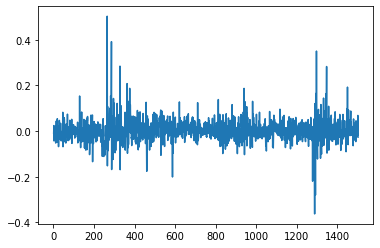

In [ ]:
dataset['RS GOL'].plot();

In [ ]:
dct_RS_anual

{'BOVA': 0.17574805993974163,
 'CVC': 0.1906820315902643,
 'GOL': 0.3933067202698199,
 'MGLU': 0.9764824693597044,
 'TOTS': 0.21560897903414697,
 'WEGE': 0.3823365030570861}

## Taxa de retorno logarítmica

In [ ]:
(dataset_raw.iloc[-1,1:]/dataset_raw.iloc[0,1:]).apply(pd.to_numeric).apply(np.log)

GOL     0.468585
CVC     0.225247
WEGE    1.956310
MGLU    4.687142
TOTS    0.868952
BOVA    0.849894
dtype: float64

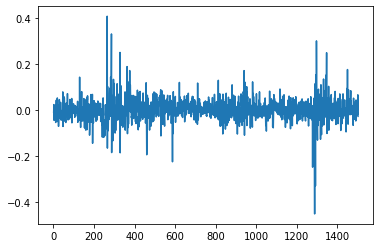

In [ ]:
dataset['RL GOL'].plot();

In [ ]:
dct_RL_anual

{'BOVA': 0.1391970366289783,
 'CVC': 0.03689126423925699,
 'GOL': 0.07674562215795967,
 'MGLU': 0.7676677224582338,
 'TOTS': 0.14231834214768976,
 'WEGE': 0.3204077091203089}

## Retorno de carteira de ações

In [ ]:
dataset = pd.read_csv('acoes.csv')
dataset

,Date,GOL,CVC,WEGE,MGLU,TOTS,BOVA
0,2015-01-02,14.990000,15.200000,11.846153,0.232812,11.910702,47.259998
1,2015-01-05,14.850000,15.000000,11.926923,0.237187,11.544731,46.320000
2,2015-01-06,15.210000,14.800000,11.750000,0.234062,10.822770,46.580002
3,2015-01-07,14.550000,14.670000,11.615384,0.241875,10.746248,48.150002
4,2015-01-08,14.270000,14.150000,11.811538,0.240000,10.995774,48.509998
...,...,...,...,...,...,...,...
1498,2021-01-22,22.670000,18.370001,88.260002,26.000000,30.150000,113.180000
1499,2021-01-26,22.209999,17.440001,88.949997,25.750000,30.110001,112.970001
1500,2021-01-27,23.030001,18.020000,88.690002,25.790001,28.740000,112.970001
1501,2021-01-28,24.610001,18.959999,87.690002,26.049999,28.920000,113.910004


In [ ]:
dataset_normalizado = dataset.copy()
dataset_normalizado.iloc[:,1:] /= dataset_normalizado.iloc[0,1:]
dataset_normalizado

,Date,GOL,CVC,WEGE,MGLU,TOTS,BOVA
0,2015-01-02,1,1,1,1,1,1
1,2015-01-05,0.99066,0.986842,1.00682,1.01879,0.969274,0.98011
2,2015-01-06,1.01468,0.973684,0.991883,1.00537,0.908659,0.985612
3,2015-01-07,0.970647,0.965132,0.980519,1.03893,0.902235,1.01883
4,2015-01-08,0.951968,0.930921,0.997078,1.03087,0.923184,1.02645
...,...,...,...,...,...,...,...
1498,2021-01-22,1.51234,1.20855,7.45052,111.678,2.53134,2.39484
1499,2021-01-26,1.48165,1.14737,7.50877,110.604,2.52798,2.39039
1500,2021-01-27,1.53636,1.18553,7.48682,110.776,2.41296,2.39039
1501,2021-01-28,1.64176,1.24737,7.4024,111.893,2.42807,2.41028


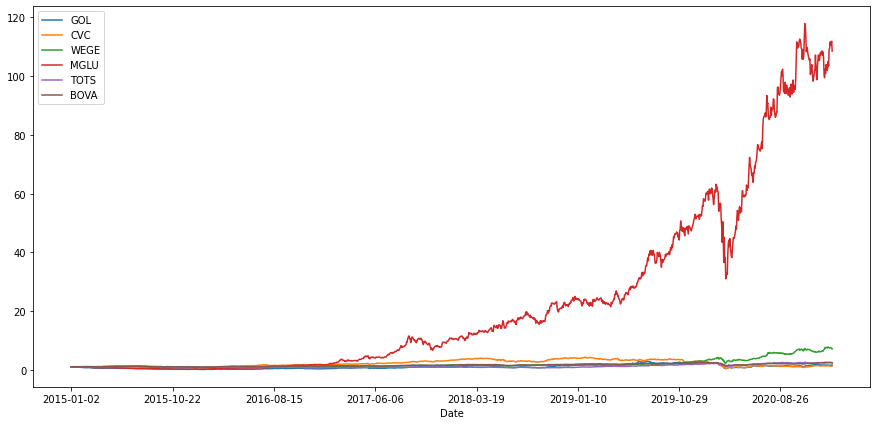

In [ ]:
dataset_normalizado.plot(x='Date', figsize=(15, 7));

In [ ]:
dataset_normalizado.drop(labels=['Date'], axis=1, inplace=True)

In [ ]:
retorno_carteira = (dataset_normalizado / dataset_normalizado.shift(1)) - 1
retorno_carteira.head()

,GOL,CVC,WEGE,MGLU,TOTS,BOVA
0,NaN,NaN,NaN,NaN,NaN,NaN
1,-0.00933952,-0.0131579,0.00681821,0.018792,-0.0307262,-0.0198899
2,0.0242424,-0.0133333,-0.0148339,-0.0131752,-0.062536,0.00561317
3,-0.0433925,-0.00878379,-0.0114567,0.03338,-0.00707045,0.0337054
4,-0.019244,-0.0354465,0.0168874,-0.00775193,0.0232198,0.00747657


In [ ]:
retorno_anual = retorno_carteira.mean() * dias_bolsa_ano
retorno_anual

GOL     0.393307
CVC     0.190682
WEGE    0.382337
MGLU    0.976482
TOTS    0.215609
BOVA    0.175748
dtype: float64

In [ ]:
list(dataset_normalizado.columns)

['GOL', 'CVC', 'WEGE', 'MGLU', 'TOTS', 'BOVA']

In [ ]:
carteira1 = {
    'GOL': 0.2,
    'CVC': 0.2,
    'WEGE': 0.2,
    'MGLU': 0.2,
    'TOTS': 0.2,
    'BOVA': 0.0
}

carteira2 = {
    'GOL': 0.1,
    'CVC': 0.2,
    'WEGE': 0.2,
    'MGLU': 0.4,
    'TOTS': 0.1,
    'BOVA': 0.0
}

assert sum(carteira1.values()) == 1.0
assert sum(carteira2.values()) == 1.0

In [ ]:
np.dot(retorno_anual, np.array(list(carteira1.values())))

0.4316833406622046

In [ ]:
np.dot(retorno_anual, np.array(list(carteira2.values())))

0.5660882646037487

## Gráfico da carteira x BOVA

In [ ]:
dataset = pd.read_csv('acoes.csv')

In [ ]:
dataset_normalizado = dataset.copy()
dataset_normalizado.iloc[:,1:] /= dataset_normalizado.iloc[0,1:]
dataset_normalizado.head()

,Date,GOL,CVC,WEGE,MGLU,TOTS,BOVA
0,2015-01-02,1,1,1,1,1,1
1,2015-01-05,0.99066,0.986842,1.00682,1.01879,0.969274,0.98011
2,2015-01-06,1.01468,0.973684,0.991883,1.00537,0.908659,0.985612
3,2015-01-07,0.970647,0.965132,0.980519,1.03893,0.902235,1.01883
4,2015-01-08,0.951968,0.930921,0.997078,1.03087,0.923184,1.02645


In [ ]:
dataset_normalizado['CARTEIRA'] = (dataset_normalizado['GOL'] + dataset_normalizado['CVC'] + dataset_normalizado['WEGE'] + dataset_normalizado['MGLU'] + dataset_normalizado['TOTS']) / 5
dataset_normalizado

,Date,GOL,CVC,WEGE,MGLU,TOTS,BOVA,CARTEIRA
0,2015-01-02,1,1,1,1,1,1,1
1,2015-01-05,0.99066,0.986842,1.00682,1.01879,0.969274,0.98011,0.994477
2,2015-01-06,1.01468,0.973684,0.991883,1.00537,0.908659,0.985612,0.978854
3,2015-01-07,0.970647,0.965132,0.980519,1.03893,0.902235,1.01883,0.971492
4,2015-01-08,0.951968,0.930921,0.997078,1.03087,0.923184,1.02645,0.966805
...,...,...,...,...,...,...,...,...
1498,2021-01-22,1.51234,1.20855,7.45052,111.678,2.53134,2.39484,24.8762
1499,2021-01-26,1.48165,1.14737,7.50877,110.604,2.52798,2.39039,24.654
1500,2021-01-27,1.53636,1.18553,7.48682,110.776,2.41296,2.39039,24.6795
1501,2021-01-28,1.64176,1.24737,7.4024,111.893,2.42807,2.41028,24.9225


In [ ]:
figura = px.line(title='Comparativo carteira x BOVA')
for i in dataset_normalizado.columns[1:]:
  figura.add_scatter(x=dataset_normalizado['Date'], y=dataset_normalizado[i], name=i)
figura.show()

In [ ]:
dataset_normalizado.drop(['GOL', 'WEGE', 'CVC', 'MGLU', 'TOTS'], axis=1, inplace=True)
dataset_normalizado

,Date,BOVA,CARTEIRA
0,2015-01-02,1,1
1,2015-01-05,0.98011,0.994477
2,2015-01-06,0.985612,0.978854
3,2015-01-07,1.01883,0.971492
4,2015-01-08,1.02645,0.966805
...,...,...,...
1498,2021-01-22,2.39484,24.8762
1499,2021-01-26,2.39039,24.654
1500,2021-01-27,2.39039,24.6795
1501,2021-01-28,2.41028,24.9225


In [ ]:
figura = px.line(title='Comparativo carteira x BOVA')
for i in dataset_normalizado.columns[1:]:
  figura.add_scatter(x=dataset_normalizado['Date'], y=dataset_normalizado[i], name=i)
figura.show()

## Exercício

### Taxa de retorno da carteira

In [ ]:
acoes_ex = ['ABEV3.SA', 'ODPV3.SA', 'VIVT3.SA', 'PETR3.SA', 'BBAS3.SA', 'BOVA11.SA']
acoes_ex_df = pd.DataFrame()
for acao in acoes_ex:
  acoes_ex_df[acao] = data.DataReader(acao, data_source='yahoo', start='2015-01-01')['Close']
acoes_ex_df.dropna(inplace=True)
acoes_ex_df = acoes_ex_df.rename(columns={'ABEV3.SA': 'AMBEV', 'ODPV3.SA': 'ODONTOPREV', 'VIVT3.SA': 'VIVO',
                                          'PETR3.SA': 'PETROBRAS', 'BBAS3.SA': 'BBRASIL', 'BOVA11.SA': 'BOVA'})
acoes_ex_df.to_csv('acoes_ex.csv')

In [ ]:
dataset = pd.read_csv('acoes_ex.csv')
dataset

,Date,AMBEV,ODONTOPREV,VIVO,PETROBRAS,BBRASIL,BOVA
0,2015-01-02,16.020000,9.37,37.820000,9.000000,22.650000,47.259998
1,2015-01-05,15.730000,9.62,37.070000,8.270000,22.180000,46.320000
2,2015-01-06,16.330000,9.55,36.150002,8.060000,22.490000,46.580002
3,2015-01-07,16.559999,9.69,37.389999,8.450000,23.480000,48.150002
4,2015-01-08,16.540001,9.66,38.910000,9.020000,23.559999,48.509998
...,...,...,...,...,...,...,...
1498,2021-01-22,15.030000,14.25,44.070000,27.700001,33.419998,113.180000
1499,2021-01-26,15.400000,14.35,44.830002,27.600000,32.790001,112.970001
1500,2021-01-27,15.400000,14.18,45.660000,27.980000,33.750000,112.970001
1501,2021-01-28,15.590000,14.58,45.639999,28.400000,34.680000,113.910004


In [ ]:
acoes_df_normalizado = dataset.copy()
acoes_df_normalizado.iloc[:,1:] /= acoes_df_normalizado.iloc[0,1:]

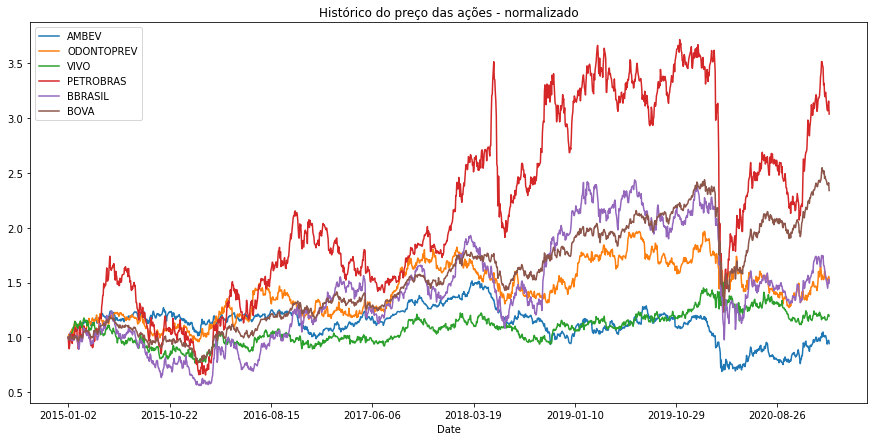

In [ ]:
acoes_df_normalizado.plot(x='Date', figsize=(15,7), title='Histórico do preço das ações - normalizado');

In [ ]:
acoes_df_normalizado.drop(columns=['Date'], inplace=True)

In [ ]:
retorno_carteira = (acoes_df_normalizado / acoes_df_normalizado.shift(1)) - 1
retorno_carteira.head()

,AMBEV,ODONTOPREV,VIVO,PETROBRAS,BBRASIL,BOVA
0,NaN,NaN,NaN,NaN,NaN,NaN
1,-0.0181024,0.0266809,-0.0198308,-0.0811111,-0.0207505,-0.0198899
2,0.0381437,-0.00727648,-0.0248179,-0.025393,0.0139765,0.00561317
3,0.0140845,0.0146596,0.0343015,0.048387,0.0440196,0.0337054
4,-0.00120764,-0.00309595,0.0406526,0.0674557,0.00340715,0.00747657


In [ ]:
retorno_anual = retorno_carteira.mean() * dias_bolsa_ano
retorno_anual

AMBEV         0.028811
ODONTOPREV    0.117543
VIVO          0.079477
PETROBRAS     0.323073
BBRASIL       0.175241
BOVA          0.175748
dtype: float64

In [ ]:
pesos_carteira = np.array([0.2, 0.2, 0.2, 0.2, 0.2, 0.0])
# carteira1 = {
#     'AMBEV': 0.2,
#     'ODONTOPREV': 0.2,
#     'VIVO': 0.2,
#     'PETROBRAS': 0.2,
#     'BRASIL': 0.2,
#     'BOVA': 0.0
# }
assert pesos_carteira.sum() == 1.0

In [ ]:
np.dot(retorno_anual, pesos_carteira)

0.14482908700964497

### Gráfico carteira x BOVA

In [ ]:
dataset = pd.read_csv('acoes_ex.csv')

In [ ]:
acoes_df_normalizado = dataset.copy()
acoes_df_normalizado.iloc[:,1:] /= acoes_df_normalizado.iloc[0,1:]

In [ ]:
dataset.columns

Index(['Date', 'AMBEV', 'ODONTOPREV', 'VIVO', 'PETROBRAS', 'BBRASIL', 'BOVA'], dtype='object')

In [ ]:
acoes_df_normalizado['CARTEIRA'] = (acoes_df_normalizado['AMBEV'] + acoes_df_normalizado['ODONTOPREV'] + acoes_df_normalizado['VIVO'] + acoes_df_normalizado['PETROBRAS'] + acoes_df_normalizado['BBRASIL']) / 5
acoes_df_normalizado

,Date,AMBEV,ODONTOPREV,VIVO,PETROBRAS,BBRASIL,BOVA,CARTEIRA
0,2015-01-02,1,1,1,1,1,1,1
1,2015-01-05,0.981898,1.02668,0.980169,0.918889,0.979249,0.98011,0.977377
2,2015-01-06,1.01935,1.01921,0.955844,0.895556,0.992936,0.985612,0.976579
3,2015-01-07,1.03371,1.03415,0.98863,0.938889,1.03664,1.01883,1.0064
4,2015-01-08,1.03246,1.03095,1.02882,1.00222,1.04018,1.02645,1.02693
...,...,...,...,...,...,...,...,...
1498,2021-01-22,0.938202,1.52081,1.16526,3.07778,1.4755,2.39484,1.63551
1499,2021-01-26,0.961298,1.53148,1.18535,3.06667,1.44768,2.39039,1.6385
1500,2021-01-27,0.961298,1.51334,1.2073,3.10889,1.49007,2.39039,1.65618
1501,2021-01-28,0.973159,1.55603,1.20677,3.15556,1.53113,2.41028,1.68453


In [ ]:
figura = px.line(title = 'Histórico do preço das ações')
for i in acoes_df_normalizado.columns[1:]:
  figura.add_scatter(x = acoes_df_normalizado['Date'], y = acoes_df_normalizado[i], name = i)
figura.show()

In [ ]:
acoes_df_normalizado.drop(['AMBEV', 'ODONTOPREV', 'VIVO', 'PETROBRAS', 'BBRASIL'], axis = 1, inplace = True)
acoes_df_normalizado

,Date,BOVA,CARTEIRA
0,2015-01-02,1,1
1,2015-01-05,0.98011,0.977377
2,2015-01-06,0.985612,0.976579
3,2015-01-07,1.01883,1.0064
4,2015-01-08,1.02645,1.02693
...,...,...,...
1498,2021-01-22,2.39484,1.63551
1499,2021-01-26,2.39039,1.6385
1500,2021-01-27,2.39039,1.65618
1501,2021-01-28,2.41028,1.68453


In [ ]:
figura = px.line(title = 'Histórico do preço das ações')
for i in acoes_df_normalizado.columns[1:]:
  figura.add_scatter(x = acoes_df_normalizado['Date'], y = acoes_df_normalizado[i], name = i)
figura.show()